# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

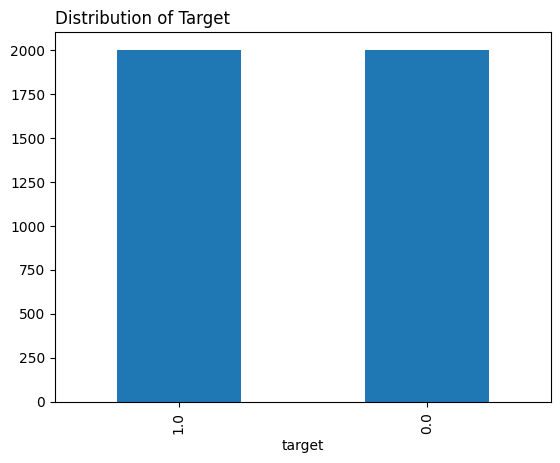

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

Because there are categorical variables present, we will have to use the OHE to perform the steps thereafter.

In [6]:
list(df.columns[4:-1])

['var4',
 'var5',
 'var6',
 'var7',
 'var8',
 'var9',
 'var10',
 'var11',
 'var12',
 'var13',
 'var14',
 'var15',
 'var16',
 'var17',
 'var18',
 'var19',
 'var20',
 'var21',
 'var22',
 'var23',
 'var24',
 'var25',
 'var26',
 'var27',
 'var28',
 'var29',
 'var30',
 'var31',
 'var32',
 'var33',
 'var34',
 'var35',
 'var36',
 'var37',
 'var38',
 'var39',
 'var40',
 'var41',
 'var42',
 'var43',
 'var44',
 'var45',
 'var46',
 'var47',
 'var48',
 'var49']

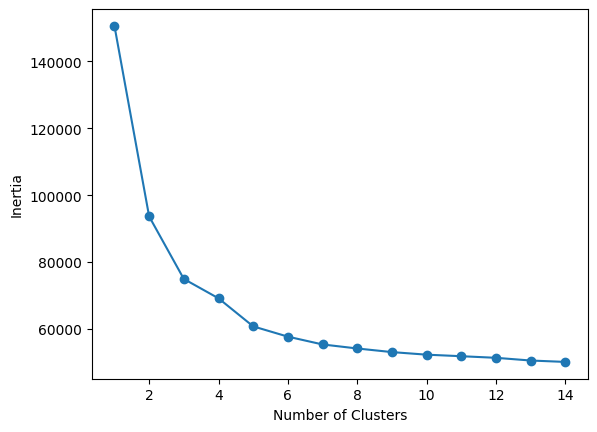

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

cat_vars = list(df.columns[0:3])
num_vars = list(df.columns[4:-1])

cat_pipeline = Pipeline([
    ('encoding', OneHotEncoder(drop='first'))
])

num_pipeline = Pipeline([
    ('scaling', StandardScaler())
])

processing_pipeline = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_vars),
    ('cat_pipeline', cat_pipeline, cat_vars)
])

distortions = list()

for i in range(1, 15):
    km_modeling_pipeline = Pipeline([
        ('processing', processing_pipeline),
        ('k-means', KMeans(n_clusters=i, random_state=0, n_init='auto')),
    ])
    
    km = km_modeling_pipeline.fit(X_train)
    distortions.append(km.named_steps['k-means'].inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

From the elbow plot, it appears that the appropriate number for k would be 6, because this is where the intertia begins to converge.

In [24]:
from sklearn.decomposition import PCA

km_modeling_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('k-means', KMeans(n_clusters=6, random_state=0, n_init='auto'))

])

pca_modeling_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('pca', PCA(n_components=2))
])

X_train_cluster_predict = km_modeling_pipeline.fit(X_train)
X_train_cluster_predict = X_train_cluster_predict.predict(X_train)
X_train_new = pca_modeling_pipeline.fit_transform(X_train)

In [26]:
new_X_train = pd.DataFrame(X_train_new)
new_X_train = pd.concat([new_X_train, pd.Series(X_train_cluster_predict)], axis=1)
new_X_train.columns = ['comp1', 'comp2', 'class']
new_X_train.head(5)

,comp1,comp2,class
0,-5.088386,-0.936921,3
1,3.995320,-0.141815,4
2,0.430151,0.611668,0
3,6.657842,-2.722088,4
4,-5.280000,-2.339248,1


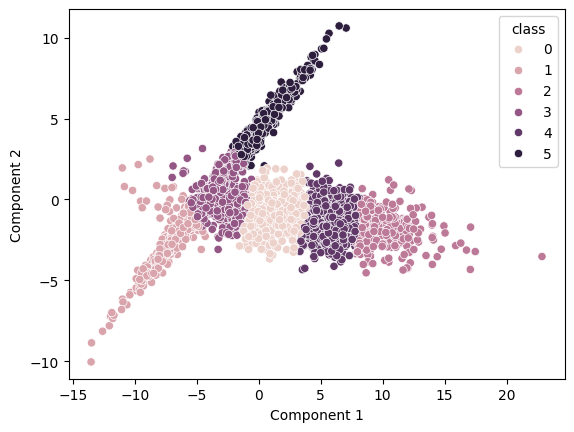

In [28]:
import seaborn as sns

sns.scatterplot(x='comp1', y='comp2', hue='class', data=new_X_train)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Based on the results of the visualization, I would say that the clustering did a relatively good job of segmenting the data into groups. It seems like the groups are tightly bound, so this could mean that additional clusters lie underneath the structure seen here, or that the clusters that were made are part of larger clusters. 

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_param_grid = [
    {
        'lr__C': [1, 10, 100, 1000]
    }
]

gs_results_lr = GridSearchCV(estimator=lr_pipeline, param_grid=lr_param_grid, cv=5, scoring='accuracy')
gs_results_lr = gs_results_lr.fit(X_train, y_train)

In [33]:
gs_results_lr.best_score_

0.943125

In [34]:
gs_results_lr.best_params_

{'lr__C': 1}

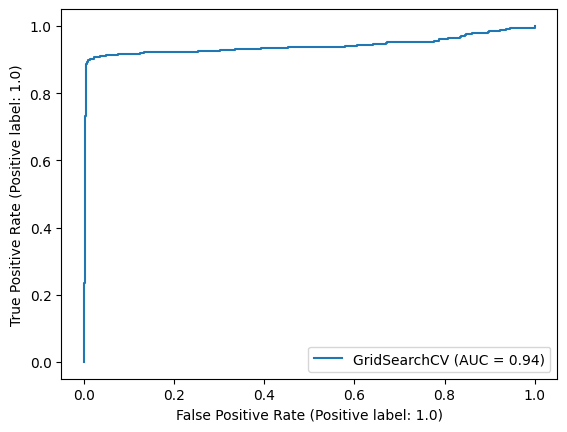

In [35]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_results_lr, X_test, y_test)

In [38]:
from sklearn.metrics import classification_report

y_hat = gs_results_lr.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



Based on these metrics, it appears that that logsitic regression model performed well, having a precision of 0.99, a recall of 0.87, an f1-score of 0.93, an accuracy of 0.93, and a ROC AUC of 0.94. 

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [40]:
lr_pca_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('pca', PCA()),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_pca_param_grid = [
    {
        'lr__C': [1, 10, 100, 1000],
        'pca__n_components': [2, 3, 4, 5]
    }
]

gs_results_lr_pca = GridSearchCV(estimator=lr_pca_pipeline, param_grid=lr_pca_param_grid, cv=5, scoring='accuracy')
gs_results_lr_pca = gs_results_lr_pca.fit(X_train, y_train)

In [41]:
gs_results_lr_pca.best_score_

0.9506249999999999

In [42]:
gs_results_lr_pca.best_params_

{'lr__C': 100, 'pca__n_components': 4}

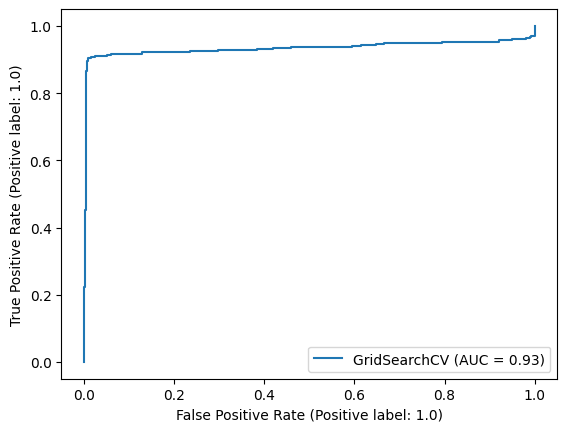

In [43]:
RocCurveDisplay.from_estimator(gs_results_lr_pca, X_test, y_test)

In [44]:
y_hat = gs_results_lr_pca.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



The metrics to this model come to 0.99 for precision, 0.87 for recall, 0.93 for f1-score, 0.93 for accuracy, and 0.93 for the ROC AUC. This does not appear to be any better or worse than the logistic regression model that did not use PCA for preprocessing.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [45]:
lr_km_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('km', KMeans(random_state=0, n_init='auto')),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_km_param_grid = [
    {
        'lr__C': [1, 10, 100, 1000],
        'km__n_clusters': [5, 6, 7, 8]
    }
]

gs_results_lr_km = GridSearchCV(estimator=lr_km_pipeline, param_grid=lr_km_param_grid, cv=5, scoring='accuracy')
gs_results_lr_km = gs_results_lr_km.fit(X_train, y_train)

In [47]:
gs_results_lr_km.best_score_

0.95625

In [46]:
gs_results_lr_km.best_params_

{'km__n_clusters': 5, 'lr__C': 100}

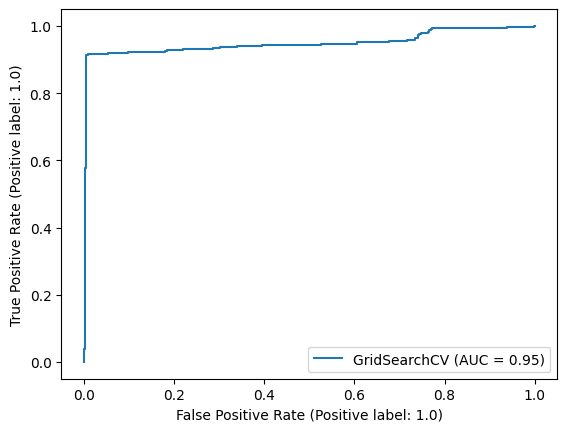

In [48]:
RocCurveDisplay.from_estimator(gs_results_lr_km, X_test, y_test)

In [49]:
y_hat = gs_results_lr_km.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       394
         1.0       0.99      0.90      0.94       406

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



The metrics for this model come to 0.99 for precision, 0.90 for recall, 0.94 for f1-score, 0.95 for accuracy, and 0.95 for ROC AUC. This model performs slightly better than the logsitic regression model without the k-Means clustering.

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

Based on the metric comparisons and the complexity of the models, I would recommend that just the logistic regression model is used. While the accuracy and other performance metrics were higher for the model that used k-Means clustering for a preprocessing step, it also comes at higher computational cost. This is shown with the time metrics below.

In [50]:
import datetime
start = datetime.datetime.now()

lr_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_param_grid = [
    {
        'lr__C': [1, 10, 100, 1000]
    }
]

gs_results_lr = GridSearchCV(estimator=lr_pipeline, param_grid=lr_param_grid, cv=5, scoring='accuracy')
gs_results_lr = gs_results_lr.fit(X_train, y_train)

finish = datetime.datetime.now()

elapsed_time = finish-start

print(f'Elapsed time: {elapsed_time}')

Elapsed time: 0:00:01.353877


In [52]:
start = datetime.datetime.now()

lr_km_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('km', KMeans(random_state=0, n_init='auto')),
    ('lr', LogisticRegression(max_iter=1000))
])

lr_km_param_grid = [
    {
        'lr__C': [1, 10, 100, 1000],
        'km__n_clusters': [5, 6, 7, 8]
    }
]

gs_results_lr_km = GridSearchCV(estimator=lr_km_pipeline, param_grid=lr_km_param_grid, cv=5, scoring='accuracy')
gs_results_lr_km = gs_results_lr_km.fit(X_train, y_train)

finish = datetime.datetime.now()

elapsed_time = finish-start

print(f'Elapsed time: {elapsed_time}')

Elapsed time: 0:00:06.050450


While the difference is small now, it will get exponentially larger with larger datasets. Thus, the best model to use would be the plain logistic regression with scaling and OHE preprocessing.